Best solution (machine assignments): [1, 2, 0, 0, 2, 1, 2, 0, 1, 2]
Best cost (makespan): 12


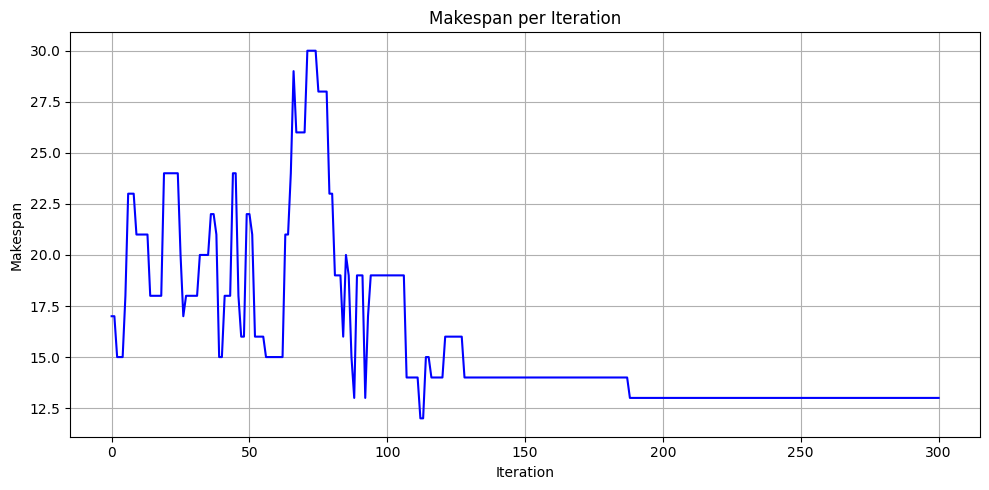

In [5]:
import random
import math
import matplotlib.pyplot as plt

def calculate_makespan(tasks, machines, num_machines):
    machine_times = [0] * num_machines
    for i, task in enumerate(tasks):
        machine_times[machines[i]] += task
    return max(machine_times)

def generate_neighbor(machines, num_machines):
    neighbor = machines[:]
    task_to_move = random.randint(0, len(machines) - 1)
    new_machine = random.randint(0, num_machines - 1)
    neighbor[task_to_move] = new_machine
    return neighbor

def simulated_annealing(tasks, num_machines, initial_temp, cooling_rate, max_iter):
    current_solution = [random.randint(0, num_machines - 1) for _ in range(len(tasks))]
    current_cost = calculate_makespan(tasks, current_solution, num_machines)  
    temperature = initial_temp

    best_solution = current_solution[:]
    best_cost = current_cost

    makespan_history = [current_cost]

    for iteration in range(max_iter):
        neighbor = generate_neighbor(current_solution, num_machines)
        neighbor_cost = calculate_makespan(tasks, neighbor, num_machines)  
        delta_cost = neighbor_cost - current_cost

        if delta_cost < 0:
            current_solution = neighbor
            current_cost = neighbor_cost
        else:
            acceptance_probability = math.exp(-delta_cost / temperature)
            if random.random() < acceptance_probability:
                current_solution = neighbor
                current_cost = neighbor_cost

        if current_cost < best_cost:
            best_solution = current_solution[:]
            best_cost = current_cost

        temperature *= cooling_rate
        makespan_history.append(current_cost)

    return best_solution, best_cost, makespan_history

# Example usage
tasks = [3, 2, 4, 6, 5, 3, 4, 2, 6, 1]  
num_machines = 3
initial_temp = 1000
cooling_rate = 0.95
max_iter = 300

best_solution, best_cost, makespan_history = simulated_annealing(tasks, num_machines, initial_temp, cooling_rate, max_iter)

print("Best solution (machine assignments):", best_solution)
print("Best cost (makespan):", best_cost)

plt.figure(figsize=(10, 5))
plt.plot(makespan_history, color='blue')
plt.title("Makespan per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Makespan")
plt.grid(True)
plt.tight_layout()
plt.show()
